# Data columns desc

* age = age in years  
* sex = (1 = male; 0 = female)  
* cp= chest pain type  
* trestbps= resting blood pressure (in mm Hg on admission to the hospital)  
* chol = serum cholestoral in mg/dl  
* fbs = ( fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
* restecg = resting electrocardiographic results  
* thalach = maximum heart rate achieved  
* exang = exercise induced angina (1 = yes; 0 = no)  
* oldpeak = ST depression induced by exercise relative to rest  
* slope = the slope of the peak exercise ST segment  
* ca = number of major vessels (0-3) colored by flourosopy  
* thal3 = normal; 6 = fixed defect; 7 = reversable defect  
* target = 1 or 0  

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score,KFold
from collections import Counter
import os
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [112]:
data = pd.read_csv('Heart Disease Dataset.csv')

In [22]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

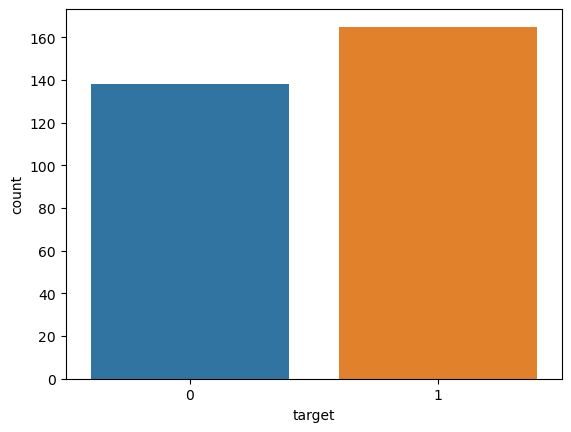

In [25]:
sns.countplot(x='target',data=data)

##### _The target is balanced_

##### _Explore data_

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### _Check for null values_

In [28]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'cp'),
  Text(0, 3.5, 'trestbps'),
  Text(0, 4.5, 'chol'),
  Text(0, 5.5, 'fbs'),
  Text(0, 6.5, 'restecg'),
  Text(0, 7.5, 'thalach'),
  Text(0, 8.5, 'exang'),
  Text(0, 9.5, 'oldpeak'),
  Text(0, 10.5, 'slope'),
  Text(0, 11.5, 'ca'),
  Text(0, 12.5, 'thal'),
  Text(0, 13.5, 'target')])

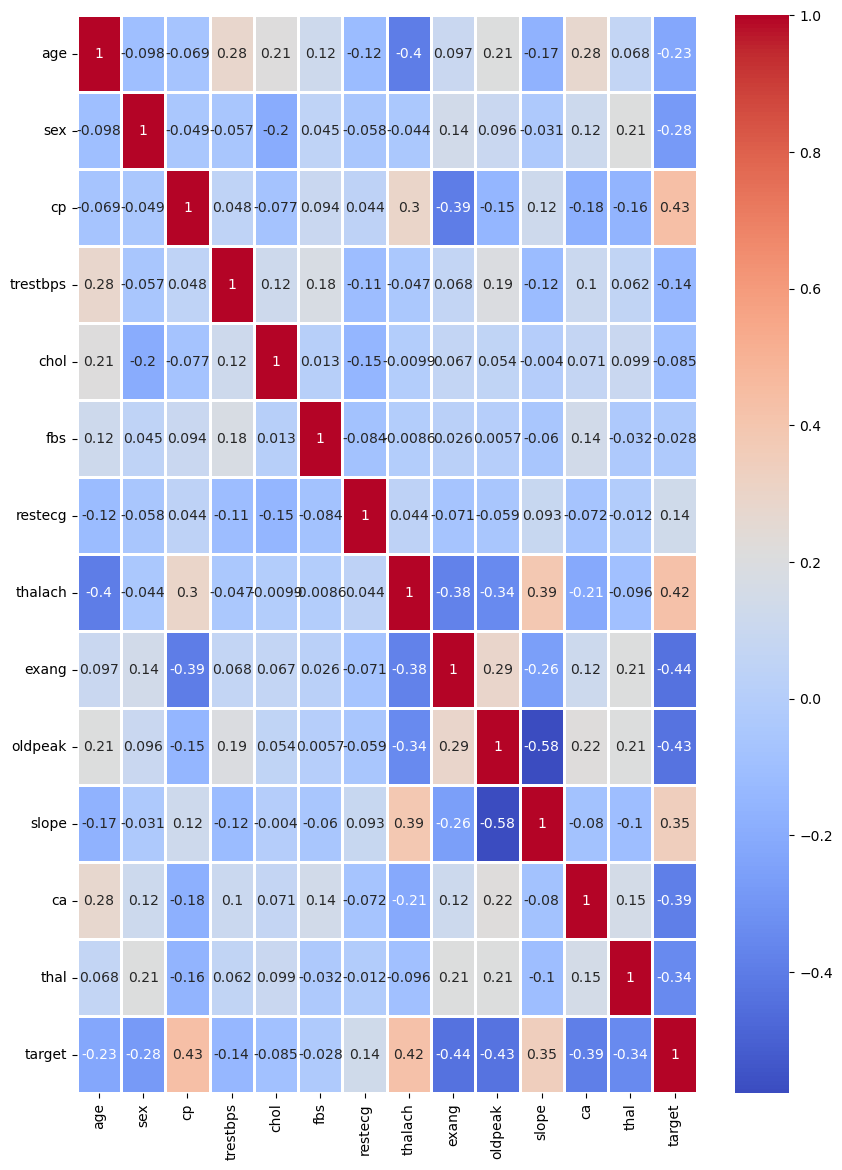

In [29]:
fig,ax = plt.subplots(figsize=(10,14))
ax = sns.heatmap(data.corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
plt.yticks(rotation=0) 

In [30]:
data.groupby('slope')['target'].sum()

slope
0      9
1     49
2    107
Name: target, dtype: int64

<Axes: xlabel='slope', ylabel='target'>

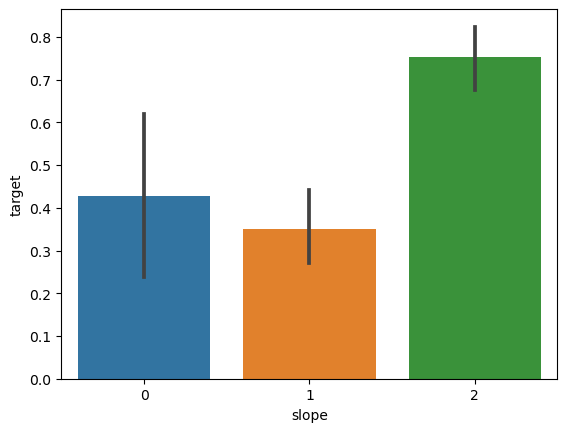

In [31]:
sns.barplot(x='slope',y='target',data=data)

<Axes: xlabel='thalach', ylabel='Density'>

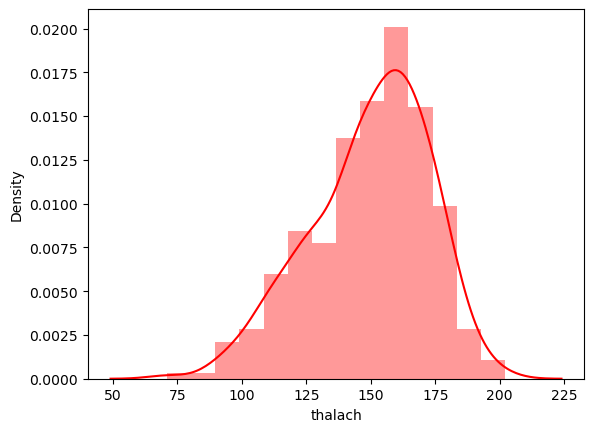

In [32]:
sns.distplot(data['thalach'],color='red')

In [33]:
data.groupby('cp')['target'].sum()

cp
0    39
1    41
2    69
3    16
Name: target, dtype: int64

<Axes: xlabel='cp', ylabel='target'>

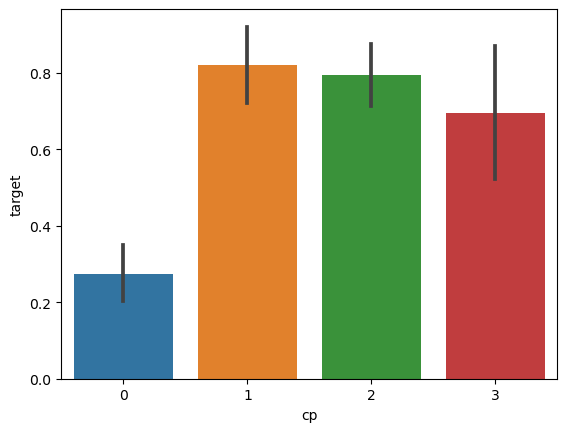

In [34]:
sns.barplot(x='cp',y='target',data=data)

<Axes: xlabel='age', ylabel='Density'>

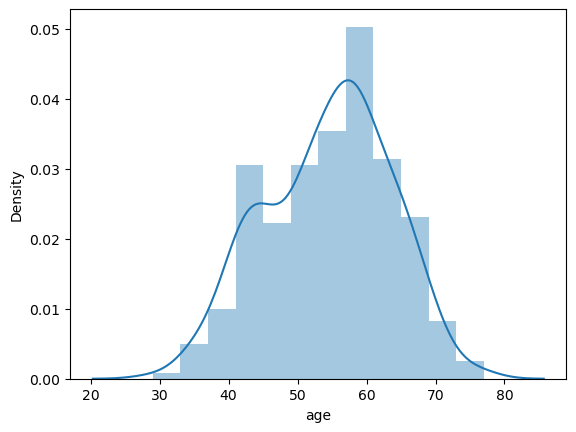

In [35]:
sns.distplot(data['age'])

# Preproccesing data

### OutLiers

In [36]:
def get_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers   
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = get_outliers(data,2,["age","chol","restecg","trestbps","oldpeak"])

In [37]:
data.loc[Outliers_to_drop]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


##### _No Outliers found_

In [38]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### -_Age_

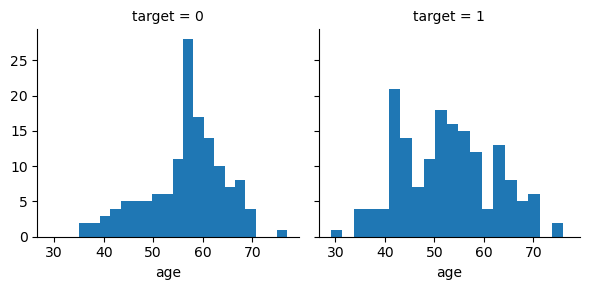

In [39]:
#age
g= sns.FacetGrid(data,col='target')
g.map(plt.hist,'age',bins=20)

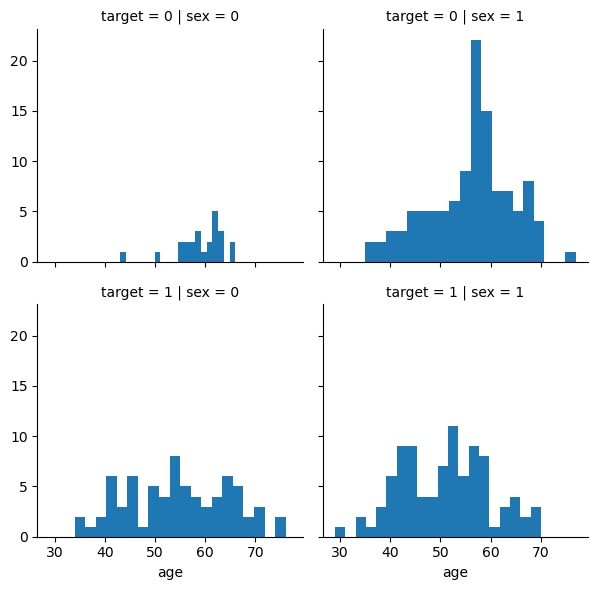

In [46]:
grid = sns.FacetGrid(data, row='target', col='sex', )
grid.map(plt.hist, 'age',  bins=20)
grid.add_legend()

##### _women are checked for disease when they are older than the men_

In [47]:
data['AgeBand'] = pd.cut(data['age'], 5)
data[['AgeBand', 'target']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,target
0,"(28.952, 38.6]",0.750000
1,"(38.6, 48.2]",0.704225
2,"(48.2, 57.8]",0.577320
3,"(57.8, 67.4]",0.377358
4,"(67.4, 77.0]",0.588235


In [48]:
data.loc[ data['age'] < 38.6, 'age_group'] = 1
data.loc[(data['age'] >= 38.6) & (data['age'] < 48.2), 'age_group'] = 2
data.loc[(data['age'] >= 48.2) & (data['age'] < 57.8), 'age_group'] = 3
data.loc[(data['age'] >= 57.8) & (data['age'] < 67.4), 'age_group'] = 4
data.loc[ data['age'] >= 67.4, 'age_group'] = 5
data['age_group'].astype('int')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeBand,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(57.8, 67.4]",4.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(28.952, 38.6]",1.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(38.6, 48.2]",2.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(48.2, 57.8]",3.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(48.2, 57.8]",3.0


In [49]:
#drop age and AgeBand
data.drop(['age','AgeBand'] , axis= 1,inplace=True)

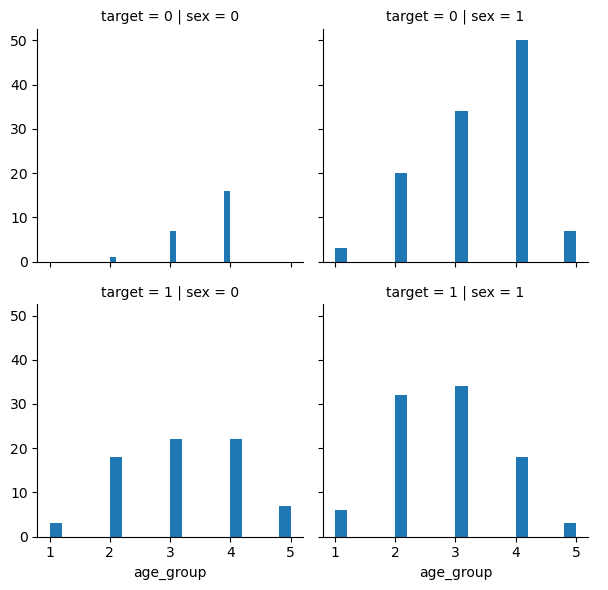

In [51]:
grid = sns.FacetGrid(data, row='target', col='sex')
grid.map(plt.hist, 'age_group',  bins=20)
grid.add_legend()

In [52]:
#change age_group to be dummy column
data = pd.get_dummies(data, columns = ['age_group'], prefix="AgeGrp")
data.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,AgeGrp_4.0,AgeGrp_5.0
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,False,False,False,True,False
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,True,False,False,False,False
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,False,True,False,False,False
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1,False,False,True,False,False
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1,False,False,True,False,False


#### -_sex_

In [53]:
data.groupby('sex')['target'].count()

sex
0     96
1    207
Name: target, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

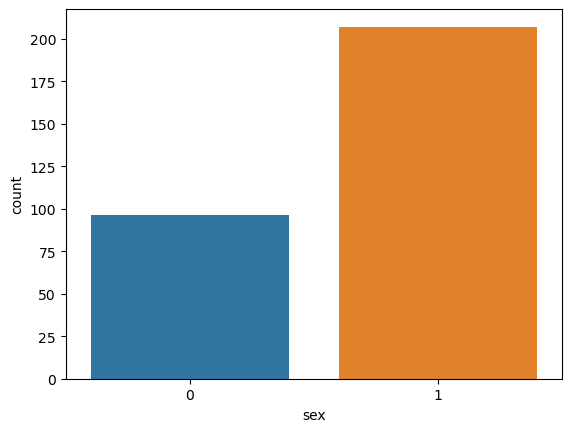

In [54]:
#sns.barplot(x='sex',y='target',data=data)
sns.countplot(data=data,x='sex')

##### _There are twice as much men than women in the data_

In [55]:
data = pd.get_dummies(data,columns = ['sex'], prefix="Sex")

#### -_cp_

In [56]:
data = pd.get_dummies(data,columns = ['cp'], prefix="CP")
data.head()

,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,...,AgeGrp_2.0,AgeGrp_3.0,AgeGrp_4.0,AgeGrp_5.0,Sex_0,Sex_1,CP_0,CP_1,CP_2,CP_3
0,145,233,1,0,150,0,2.3,0,0,1,...,False,False,True,False,False,True,False,False,False,True
1,130,250,0,1,187,0,3.5,0,0,2,...,False,False,False,False,False,True,False,False,True,False
2,130,204,0,0,172,0,1.4,2,0,2,...,True,False,False,False,True,False,False,True,False,False
3,120,236,0,1,178,0,0.8,2,0,2,...,False,True,False,False,False,True,False,True,False,False
4,120,354,0,1,163,1,0.6,2,0,2,...,False,True,False,False,True,False,True,False,False,False


##### -_trestbps_

<Axes: xlabel='trestbps', ylabel='Density'>

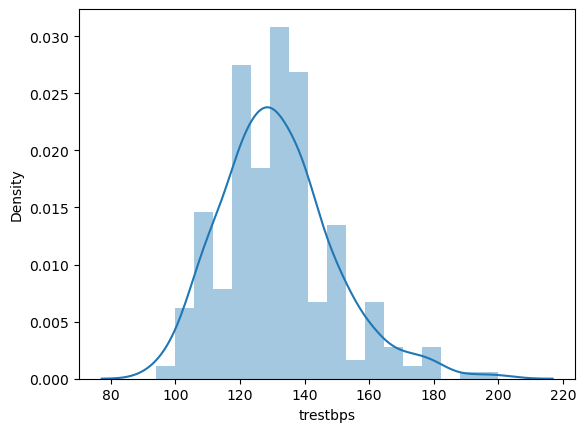

In [57]:
sns.distplot(data['trestbps'])

##### -_chol_

<Axes: xlabel='chol', ylabel='Density'>

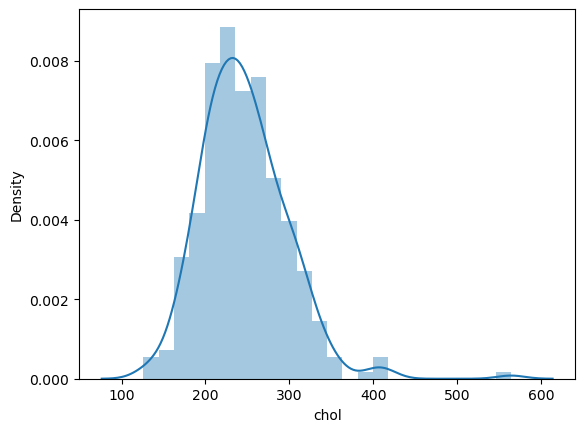

In [58]:
sns.distplot(data['chol'])

In [59]:
data['chol'].skew()

1.1434008206693387

##### -_fbs_

In [60]:
data['fbs'].value_counts() /data.shape[0] * 100

fbs
0    85.148515
1    14.851485
Name: count, dtype: float64

<Axes: ylabel='count'>

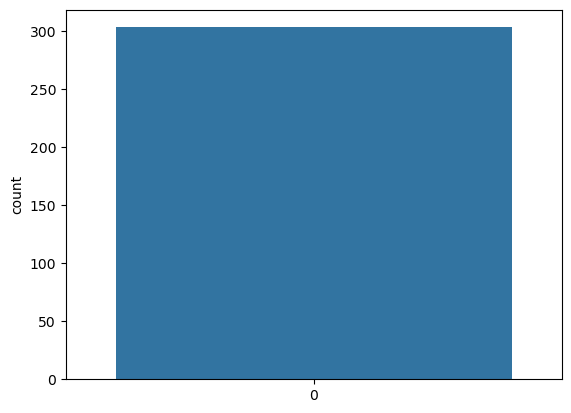

In [119]:
sns.countplot(data['fbs'])

##### _Not many people died from complications of high suger level_

In [62]:
data = pd.get_dummies(data,columns=['fbs'],prefix='fbs')
data.head()

,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target,...,AgeGrp_4.0,AgeGrp_5.0,Sex_0,Sex_1,CP_0,CP_1,CP_2,CP_3,fbs_0,fbs_1
0,145,233,0,150,0,2.3,0,0,1,1,...,True,False,False,True,False,False,False,True,False,True
1,130,250,1,187,0,3.5,0,0,2,1,...,False,False,False,True,False,False,True,False,True,False
2,130,204,0,172,0,1.4,2,0,2,1,...,False,False,True,False,False,True,False,False,True,False
3,120,236,1,178,0,0.8,2,0,2,1,...,False,False,False,True,False,True,False,False,True,False
4,120,354,1,163,1,0.6,2,0,2,1,...,False,False,True,False,True,False,False,False,True,False


##### -_restecg_
The electrocardiogram (ECG or EKG) is a noninvasive test that is used to reflect underlying heart conditions by measuring the electrical activity of the heart. By positioning leads (electrical sensing devices) on the body in standardized locations, health care professionals can learn information about many heart conditions by looking for characteristic patterns on the EKG.

from https://www.medicinenet.com/electrocardiogram_ecg_or_ekg/article.htm



<Axes: ylabel='count'>

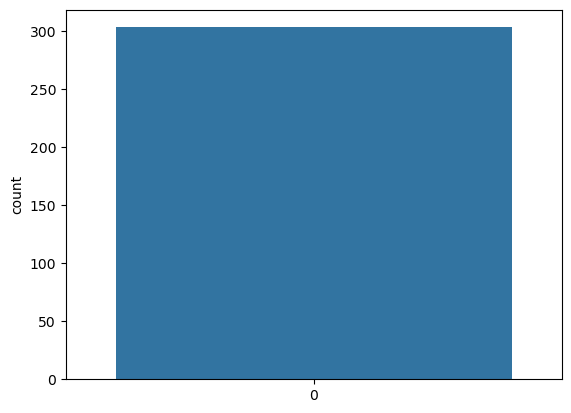

In [120]:
sns.countplot(data['restecg'])

In [64]:
data = pd.get_dummies(data,columns=['restecg'],prefix='restecg')
data.head()

,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target,AgeGrp_1.0,...,Sex_1,CP_0,CP_1,CP_2,CP_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2
0,145,233,150,0,2.3,0,0,1,1,False,...,True,False,False,False,True,False,True,True,False,False
1,130,250,187,0,3.5,0,0,2,1,True,...,True,False,False,True,False,True,False,False,True,False
2,130,204,172,0,1.4,2,0,2,1,False,...,False,False,True,False,False,True,False,True,False,False
3,120,236,178,0,0.8,2,0,2,1,False,...,True,False,True,False,False,True,False,False,True,False
4,120,354,163,1,0.6,2,0,2,1,False,...,False,True,False,False,False,True,False,False,True,False


##### -_thalach_

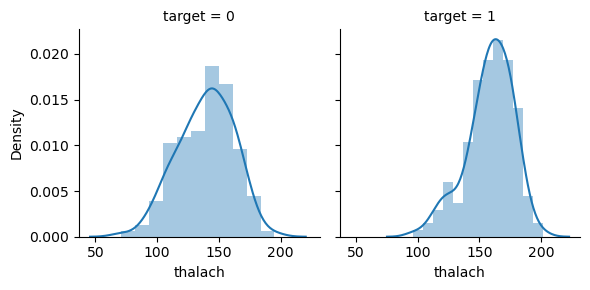

In [65]:
g= sns.FacetGrid(data,col='target')
g.map(sns.distplot,'thalach')

##### -_exang_


Angina is a type of chest pain caused by reduced blood flow to the heart. Angina (an-JIE-nuh or AN-juh-nuh) is a symptom of coronary artery disease.

Angina, also called angina pectoris, is often described as squeezing, pressure, heaviness, tightness or pain in your chest. Some people with angina symptoms say angina feels like a vise squeezing their chest or a heavy weight lying on their chest. Angina may be a new pain that needs to be checked by a doctor, or recurring pain that goes away with treatment.

Although angina is relatively common, it can still be hard to distinguish from other types of chest pain, such as the discomfort of indigestion. If you have unexplained chest pain, seek medical attention right away.

https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373

In [66]:
data['exang'].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

<Axes: ylabel='count'>

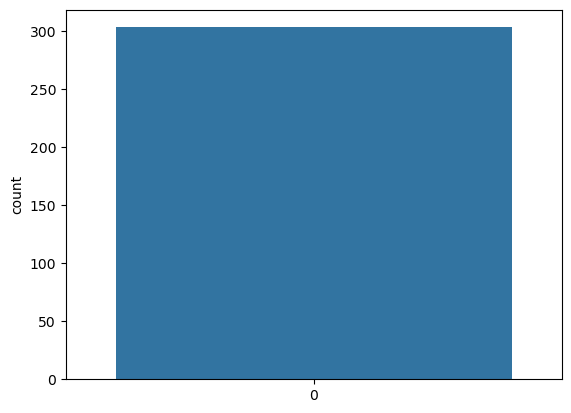

In [118]:
sns.countplot(data['fbs'])

In [68]:
data = pd.get_dummies(data,columns=['exang'],prefix='exang')

##### -_oldpeak_

In a cardiac stress test, an ST depression of at least 1 mm after adenosine administration indicates a reversible ischaemia, while an exercise stress test requires an ST depression of at least 2 mm to significantly indicate reversible ischaemia.

https://en.wikipedia.org/wiki/ST_depression

<Axes: xlabel='oldpeak', ylabel='Density'>

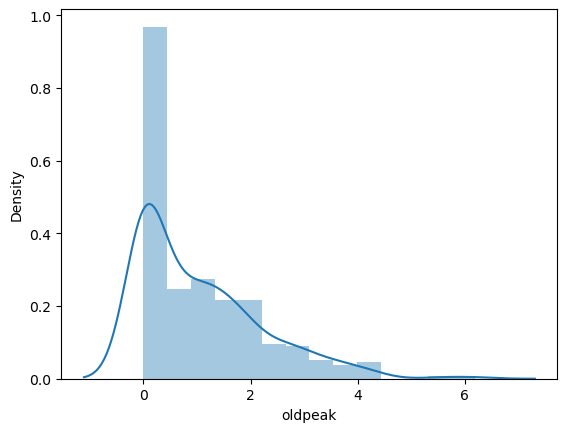

In [69]:
sns.distplot(data['oldpeak'])

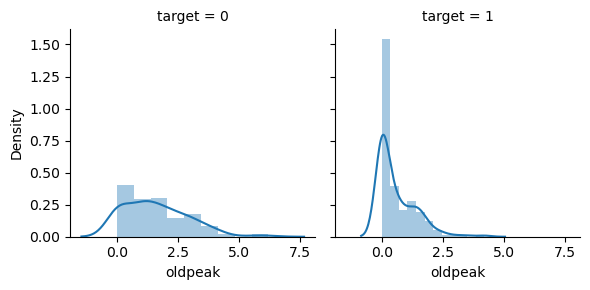

In [70]:
g= sns.FacetGrid(data,col='target')
g.map(sns.distplot,'oldpeak')

##### -_slope_

In [71]:
data = pd.get_dummies(data,columns=['slope'],prefix='slope')

##### -_ca_

<Axes: xlabel='ca', ylabel='target'>

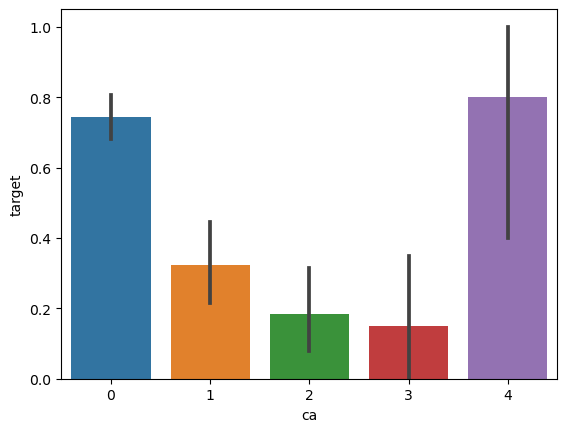

In [72]:
sns.barplot(x='ca',y='target',data=data)

In [73]:
data = pd.get_dummies(data,columns=['ca'],prefix='ca')

##### -_thal_

<Axes: xlabel='thal', ylabel='target'>

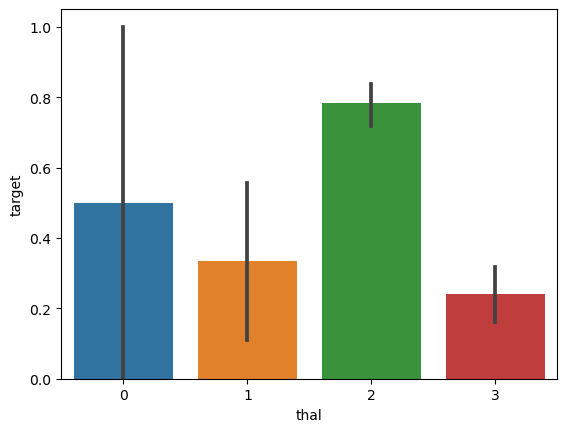

In [74]:
sns.barplot(x='thal',y='target',data=data)

In [75]:
data = pd.get_dummies(data,columns=['thal'],prefix='thal')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   trestbps    303 non-null    int64  
 1   chol        303 non-null    int64  
 2   thalach     303 non-null    int64  
 3   oldpeak     303 non-null    float64
 4   target      303 non-null    int64  
 5   AgeGrp_1.0  303 non-null    bool   
 6   AgeGrp_2.0  303 non-null    bool   
 7   AgeGrp_3.0  303 non-null    bool   
 8   AgeGrp_4.0  303 non-null    bool   
 9   AgeGrp_5.0  303 non-null    bool   
 10  Sex_0       303 non-null    bool   
 11  Sex_1       303 non-null    bool   
 12  CP_0        303 non-null    bool   
 13  CP_1        303 non-null    bool   
 14  CP_2        303 non-null    bool   
 15  CP_3        303 non-null    bool   
 16  fbs_0       303 non-null    bool   
 17  fbs_1       303 non-null    bool   
 18  restecg_0   303 non-null    bool   
 19  restecg_1   303 non-null    b

In [77]:
target = data['target']
data.drop('target',axis=1,inplace=True)

# Normalize nomeric data

In [78]:
numeric_feats = data.dtypes[data.dtypes != "uint8" ].index
numeric_feats

Index(['trestbps', 'chol', 'thalach', 'oldpeak', 'AgeGrp_1.0', 'AgeGrp_2.0',
       'AgeGrp_3.0', 'AgeGrp_4.0', 'AgeGrp_5.0', 'Sex_0', 'Sex_1', 'CP_0',
       'CP_1', 'CP_2', 'CP_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1',
       'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2',
       'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

In [79]:
ss= StandardScaler()
data[numeric_feats] = ss.fit_transform(data[numeric_feats])

In [80]:
data.head()

,trestbps,chol,thalach,oldpeak,AgeGrp_1.0,AgeGrp_2.0,AgeGrp_3.0,AgeGrp_4.0,AgeGrp_5.0,Sex_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.763956,-0.256334,0.015443,1.087338,-0.203069,-0.553204,-0.686202,1.363265,-0.243804,-0.681005,...,-0.939142,0.855236,-0.522599,-0.378677,-0.265841,-0.129532,-0.081514,3.979112,-1.100763,-0.793116
1,-0.092738,0.072199,1.633471,2.122573,4.924429,-0.553204,-0.686202,-0.733533,-0.243804,-0.681005,...,-0.939142,0.855236,-0.522599,-0.378677,-0.265841,-0.129532,-0.081514,-0.251312,0.908461,-0.793116
2,-0.092738,-0.816773,0.977514,0.310912,-0.203069,1.807652,-0.686202,-0.733533,-0.243804,1.468418,...,1.064802,0.855236,-0.522599,-0.378677,-0.265841,-0.129532,-0.081514,-0.251312,0.908461,-0.793116
3,-0.663867,-0.198357,1.239897,-0.206705,-0.203069,-0.553204,1.457296,-0.733533,-0.243804,-0.681005,...,1.064802,0.855236,-0.522599,-0.378677,-0.265841,-0.129532,-0.081514,-0.251312,0.908461,-0.793116
4,-0.663867,2.082050,0.583939,-0.379244,-0.203069,-0.553204,1.457296,-0.733533,-0.243804,1.468418,...,1.064802,0.855236,-0.522599,-0.378677,-0.265841,-0.129532,-0.081514,-0.251312,0.908461,-0.793116


# Modeling

* Gradient Boosting
* Random forest
* Adaboost
* SVM

In [81]:
#split data to train and test 
x_train,x_test,y_train,y_test = train_test_split(data.values , target.values ,train_size = 0.75)

In [82]:
print(f'{x_train.shape}  {y_train.shape} {x_test.shape} {y_test.shape}')

(227, 34)  (227,) (76, 34) (76,)


##### _cross validation_

In [83]:
def run_cv_model(classifier,x,y,**params):
    clf = classifier(**params)
    
    scores = cross_val_score(clf,x,y,cv=5)

    return round(scores.mean() * 100,2)

##### -_Gradient boosting_

In [85]:
gb_score = run_cv_model(GradientBoostingClassifier,x_train,y_train ,learning_rate = 0.1,n_estimators =500)
gb_score

75.82

In [86]:
gb_score_1 =  run_cv_model(GradientBoostingClassifier,x_train,y_train ,learning_rate = 0.5,n_estimators= 500)
gb_score_1

74.02

In [87]:
gb_score_2 =  run_cv_model(GradientBoostingClassifier,x_train,y_train ,learning_rate  = 0.1,n_estimators = 200)
gb_score_2

74.92

##### -_Random Forest_

In [88]:
rf_score_1 = run_cv_model(RandomForestClassifier,x_train,y_train , n_estimators = 500 ,criterion ='gini',max_depth =1)
rf_score_1

83.26

In [89]:
rf_score_2 = run_cv_model(RandomForestClassifier,x_train,y_train , n_estimators =500 ,criterion ='entropy',max_depth =1)
rf_score_2

83.25

In [90]:
rf_score_3 = run_cv_model(RandomForestClassifier,x_train,y_train , n_estimators =1000 ,criterion = 'entropy',max_depth =1)
rf_score_3

84.12

In [91]:
rf_score_4 = run_cv_model(RandomForestClassifier,x_train,y_train , n_estimators = 1000 ,criterion = 'gini',max_depth =1)
rf_score_4

82.8

##### -_AdaBoost_

In [92]:
ab_score_1 = run_cv_model(AdaBoostClassifier,x_train,y_train , n_estimators = 100,learning_rate=1)
ab_score_1  

75.33

In [93]:
ab_score_2 = run_cv_model(AdaBoostClassifier,x_train,y_train , n_estimators =1000,learning_rate=1)
ab_score_2   

71.36

In [94]:
ab_score_3 = run_cv_model(AdaBoostClassifier,x_train,y_train , n_estimators =100,learning_rate =0.1)
ab_score_3  

81.08

In [95]:
ab_score_4 = run_cv_model(AdaBoostClassifier,x_train,y_train , n_estimators = 1000,learning_rate= 0.1)
ab_score_4   

75.35

##### -_SVM_

In [96]:
svm_score_1 = run_cv_model(SVC,x_train,y_train , C =1,kernel ='rbf')
svm_score_1  

81.06

In [97]:
svm_score_2 = run_cv_model(SVC,x_train,y_train , C =0.1,kernel ='rbf')
svm_score_2 

83.71

In [98]:
svm_score_3 = run_cv_model(SVC,x_train,y_train , C = 1,kernel = 'linear')
svm_score_3

78.85

In [99]:
svm_score_4 = run_cv_model(SVC,x_train,y_train , C= 0.1,kernel='linear')
svm_score_4

79.3

In [100]:
svm_score_5 = run_cv_model(SVC,x_train,y_train , C =1,kernel ='poly')
svm_score_5

82.8

In [101]:
svm_score_6 = run_cv_model(SVC,x_train,y_train , C = 0.1,kernel='poly')
svm_score_6

54.62

In [102]:
models_names = ['Gradient boosting','Gradient boosting','Gradient boosting','Random forest','Random forest',
                'Random forest','Random forest','Adaboost','Adaboost','Adaboost','Adaboost',
               'SVM','SVM','SVM','SVM','SVM','SVM']
models_scores =[gb_score , gb_score_1,gb_score_2,rf_score_1,rf_score_2,rf_score_3,rf_score_4,
               ab_score_1,ab_score_2,ab_score_3,ab_score_4,svm_score_1,svm_score_2,svm_score_3,svm_score_4,svm_score_5,svm_score_6]
cross_validation_df = pd.DataFrame({'Model' :models_names,'Score' :models_scores})
cross_validation_df

,Model,Score
0,Gradient boosting,75.82
1,Gradient boosting,74.02
2,Gradient boosting,74.92
3,Random forest,83.26
4,Random forest,83.25
5,Random forest,84.12
6,Random forest,82.80
7,Adaboost,75.33
8,Adaboost,71.36
9,Adaboost,81.08


In [103]:
cross_validation_df.groupby('Model').max()

,Score
Model,
Adaboost,81.08
Gradient boosting,75.82
Random forest,84.12
SVM,83.71


# Stacking best cross validation from 4 models

In [104]:
def get_oof(classifier, x_train, y_train, x_test,n_folds,**params):
    oof_train = np.zeros(x_train.shape[0])
    oof_test = np.zeros(x_test.shape[0])
    oof_test_skf = np.empty((n_folds, len(y_test)))
   
    clf = classifier(**params) 
    kf = KFold(n_splits=n_folds) 
    for i, (train_index, valid_index) in enumerate(kf.split(x_train,y_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_valid = x_train[valid_index]

        clf.fit(x_tr, y_tr)

        oof_train[valid_index] = clf.predict(x_valid)
        oof_test_skf[i, :] = clf.predict(x_test)

    
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [105]:
#start stacking
gd_oof_train , gd_oof_test =  get_oof(GradientBoostingClassifier,x_train,y_train ,x_test , 5,learning_rate  = 0.1,n_estimators = 200)
rf_oof_train , rf_oof_test =  get_oof(RandomForestClassifier,x_train,y_train ,x_test,5, n_estimators =500 ,criterion ='entropy',max_depth =1)
ad_oof_train , ad_oof_test =  get_oof(AdaBoostClassifier,x_train,y_train ,x_test,5, n_estimators = 1000,learning_rate= 0.1)
svm_oof_train,svm_oof_test =  get_oof(SVC,x_train,y_train ,x_test,5, C= 0.1,kernel='linear')

In [106]:
#construct new training set from stacking
x_stacking_train = pd.DataFrame({'Gradient boosting':gd_oof_train.flatten() , 'Random forest': rf_oof_train.flatten(),
                                'Adaboost' : ad_oof_train.flatten() , 'SVM':svm_oof_train.flatten()})

x_stacking_train.head()

,Gradient boosting,Random forest,Adaboost,SVM
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


_Stage 2 in stacking run the stacking train data through another boosting meta model_

In [107]:
x_stacking_test =np.c_[gd_oof_test,rf_oof_test]
x_stacking_test = np.c_[x_stacking_test,ad_oof_test]
x_stacking_test = np.c_[x_stacking_test,svm_oof_test]

In [108]:
x_stacking_test.shape

(76, 4)

In [109]:
xgClf = xgb.XGBClassifier(n_estimators= 2000,
 max_depth= 4,
 gamma=0.9,
 nthread= -1,
 scale_pos_weight=1)

xgClf.fit(x_stacking_train.values,y_train)

y_pred = xgClf.predict(x_stacking_test)

score = round(accuracy_score(y_pred,y_test) * 100,2)

print(f'Final score for predicting death by heart disease is {score}')

Final score for predicting death by heart disease is 88.16
